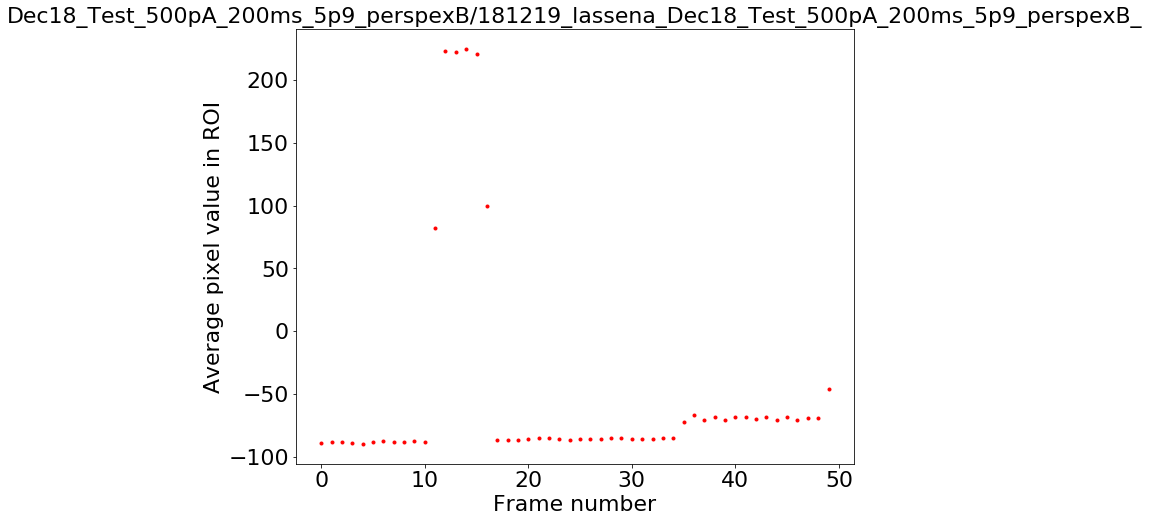

"\ndef image_info(image):\n    with tiff.TiffFile('LASSENA proton/171219_Dec_17_test_500pA_200ms_radiograph_1_2.tiff') as tif:\n        print(tif.pages[0])\n        tag = tif.pages[0].tags['Resolution']\n        print(tag.value)\n        print(tag.name)\n        print(tag.code)\n        print(tag.count)\n        print(tag.dtype)\n        print(tag.valueoffset)\n\n"

In [90]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
import os
import ast
from datetime import datetime
from datetime import timedelta
from PIL import Image
import skimage
path = 'Dec18_Test_500pA_200ms_5p9_perspexB/'
ending ='181219_lassena_Dec18_Test_500pA_200ms_5p9_perspexB_'
filename = path+ending
params = {'legend.fontsize': '22',
          'figure.figsize': (10, 8),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}
plt.rcParams.update(params)
files = next(os.walk(path))[2]
#Ideally create a file with background images and images that are irradiated


file_count = np.arange(0,len(files)-1,1)
roi = ([0,1204],[0,1000])
def image_ret(file_num):return tiff.imread(filename+str(file_num)+'.tiff')
def darkpv(bckr_count): return np.array([image_ret(i) for i in bckr_count]).mean(axis=0)
bckr_count = np.arange(0,16,1)
dark = darkpv(bckr_count)
def get_images(files): return np.array([image_ret(i)-dark for i in files])
def avg_pixel(images,roi): return np.array([np.mean(images[i][roi[0][0]:roi[0][1]][roi[1][0]:roi[1][1]]) for i in file_count])
def sum_pixel(images): return images.sum(axis=0)

a = image_ret(12)

#Sam Code
#######
    

def getImageDescription(im): return ast.literal_eval(im.tag[270][0]) 
def getClockScalingFactor(): return (28/1000)/(1750000) 
def getImageWidth(im): return int(im.tag[256][0])
def getImageHeight(im): return int(im.tag[257][0])
def getDateTime(im): return datetime.strptime(im.tag[306][0],"%Y:%m:%d %H:%M:%S")
def getFrameTime(im): return getDateTime(im) + timedelta(microseconds=(float(getImageDescription(im)['tstamp'])*16/1000.0))
def get_tiff_time_stamp(im): return float(getImageDescription(im)["tstamp"])*getClockScalingFactor()
def get_tiff_integration_time(im): return float(getImageDescription(im)["integration time"])*getClockScalingFactor()


im = Image.open(filename+str(1)+'.tiff') #open image as PIL
#print(im)
im2 = Image.open(filename+str(2)+'.tiff')
#######

images = get_images(file_count)
av_pvs = avg_pixel(images,roi)
sum_pvs = sum_pixel(images)

#plt.imshow(sum_pvs,cmap='gray')
#plt.title('Cumulative pixel value')
#plt.show()

plt.plot(file_count,av_pvs,'r.')
plt.xlabel('Frame number')
plt.ylabel('Average pixel value in ROI')
plt.title(filename)
plt.savefig(filename+'.pdf')
plt.show()

#plt.plot(sum_pvs.mean(axis=0),'r.',label='Sum of dose averaged along x axis')
#plt.plot(sum_pvs.mean(axis=1),'g.',label='Sum of dose averaged along y axis')
#plt.xlabel('x/y axis')
#plt.ylabel('Total Pixel value')
#plt.legend()
#plt.show()
'''
def image_info(image):
    with tiff.TiffFile('LASSENA proton/171219_Dec_17_test_500pA_200ms_radiograph_1_2.tiff') as tif:
        print(tif.pages[0])
        tag = tif.pages[0].tags['Resolution']
        print(tag.value)
        print(tag.name)
        print(tag.code)
        print(tag.count)
        print(tag.dtype)
        print(tag.valueoffset)

'''

In [91]:
import ipywidgets as widgets
widgets.FileUpload(
    accept='.tiff',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [92]:
[uploaded_file] = uploader.value
uploader.value
print(uploader)
uploaded_filename = next(iter(uploader.value))
content = uploader.value[uploaded_filename]['content']

a = tiff.imread(widgets.Image(value=content))
    

ValueError: not enough values to unpack (expected 1, got 0)

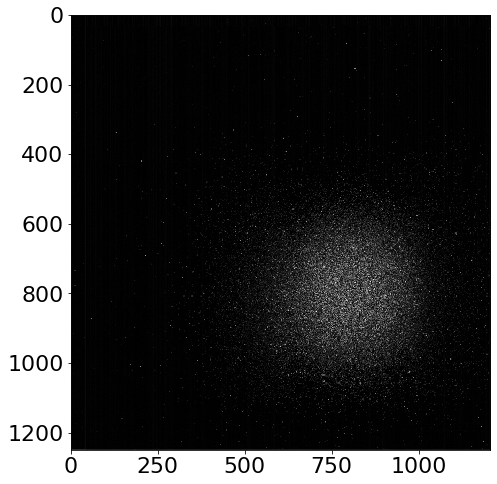

In [93]:
from scipy import signal
Gx = signal.convolve(np.array([[-1,0,+1],[-2,0,+2],[-1,0,+1]]),a)
Gy = signal.convolve(np.array([[-1,-2,-1],[0,0,0],[+1,+2,+1]]),a)
G = np.sqrt(Gx**2+Gy**2)
plt.imshow(G,cmap='gray')